<a href="https://colab.research.google.com/github/kimhwijin/korean_food_classifier/blob/master/%08korean_food_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (49.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
from PIL import Image
import sys
import numpy as np

In [ ]:
!git clone https://github.com/kimhwijin/korean_food_classifier.git

Cloning into 'korean_food_classifier'...
remote: Enumerating objects: 538, done.
remote: Counting objects: 100% (538/538), done.
remote: Compressing objects: 100% (402/402), done.
remote: Total 538 (delta 312), reused 304 (delta 131), pack-reused 0
Receiving objects: 100% (538/538), 13.90 MiB | 2.17 MiB/s, done.
Resolving deltas: 100% (312/312), done.


In [ ]:
sys.path.append(os.getcwd() + '/korean_food_classifier')

In [ ]:
from predict.predict import predict
images, labels = predict()

(4, 299, 299, 3)


In [ ]:
def plot_multiple_images(images,labels, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols*4, n_rows*4))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        print(labels[index])
        #plt.title(labels[index])
        plt.imshow(image, cmap="binary")
        plt.axis("off")


감자전
꼬막찜
만두
만두


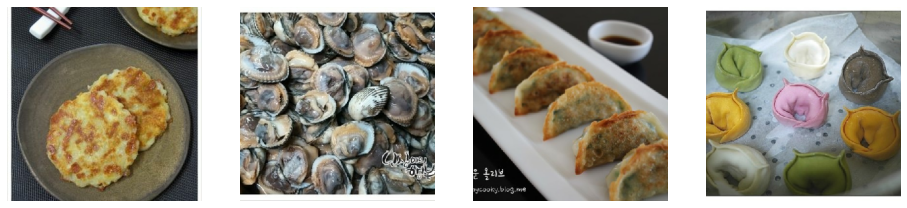

In [ ]:
plot_multiple_images(images, labels)